<a href="https://colab.research.google.com/github/Handrum/Equipo-98/blob/main/Actividad_Semana_9_Equipo06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 9**
###**Bayes ingenuo y vecino más cercano**


---
**<h3>Nombres y matrículas de los integrantes del equipo:<h3>**

*   Erick Alexei Cambray Servin - A01794243
*   Carlos Daniel Mendoza Paz - A01793027
*   Herbert Joadan Romero Villarreal - A01794199
*   Andrés Felipe Velasco Muñoz - A01676755
---



Esta Tarea se deberá resolver en equipos, de acuerdo a como fueron integrados al inicio del curso.

Como has notado a lo largo del curso, una gran cantidad de métricas se han estado utilizando a lo largo de los diferentes tipos de problemáticas. Aunque en general sabemos que un problema generalmente no se aborda usando una sola métrica, sí conviene tener una idea clara de qué información nos proporciona cada una de las diferentes métricas que se seleccionan. Asimismo tener claro que la comparación de modelos diferentes con métricas diferentes no siempre es del todo válido.

En particular, para los problemas de clasificación se propone una taxonomía de las métricas para clasificación por los autores del siguiente artículo:

[C. Ferri, J. Hernández-Orallo, R. Modroiu, An experimental comparison of performance measures for classification, Pattern Recognition Letters, Volume 30, Issue 1, 2009, Pages 27-38.](https://scholar.google.com/scholar?q=10.1016%2Fj.patrec.2008.08.010%20An%20experimental%20comparison%20of%20performance%20measures%20for%20classification%20Pattern%20recognition%20letters%202009%200167-8655%20FERRI%20C%20HERNANDEZ-ORALLO%2C%20J%20MODROIU%2C%20R%20)



## Ejercicio 1
Realiza un resumen de máximo 1 cuartilla de dicho artículo.

## Ejercicios 2 - 5
Con base a la taxonomía de tres tipos de métricas definidas en el artículo (threshold, probabilistic and ranks) analiza los siguientes conjuntos de datos y en cada uno de ellos deberás hacer una propuesta de cuál o cuáles serían las mejores métricas a utilizar en cada caso. Justifica adecuadamente cada propuesta de acuerdo al tipo de problema y tipo de datos.

En particular haz énfasis en la métricas que hemos estado estudiando en el curso, las cuales de manera general han sido varias de las principales que usualmente se aplican, o en dado caso algunas de sus variantes. Asimismo determina se lo consideras un problema de clases o no balanceadas. Lee la información de cada liga para que contextuelices el “entendimiento del negocio”.

NOTA: Puedes hacer una inspección de los datos, pero no se tienen que ejecutar modelos para su
entrenamiento y evaluación.

### 2) Breast Cancer Wisconsin (Diagnostic) Data Set
Este es el [enlace al dataset](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic))

In [ ]:
# Módulos, librerías y paquetes.
import pandas as pd

In [ ]:
# Descargamos nuestro dataset
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
df_bc = pd.read_csv(path, header=None)

# Hacemos un head para ver el dataset
df_bc.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df_bc.describe()

,0,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


---
### Objetivo y descripción del problema
La finalidad de este conjunto de datos, es poder determinar si un paciente tiene un tipo de cáncer de mama benigno o maligno a través de estudios realizados con la técnica de aspirados con aguja fina (fine-needle aspirates). Para ello se usa un clasificador machine learning llamado: método de árbol multisuperficie (MSM-T). Las características se calculan a partir de una imagen digitalizada de una aguja fina (PAAF) de una masa mamaria. Algunas de las imágenes se pueden encontrar [aquí](http://www.cs.wisc.edu/~street/images/).

Se busca detectar si un paciente presenta cáncer de mama benigno o maligno.

### Clases balanceadas o no balanceadas


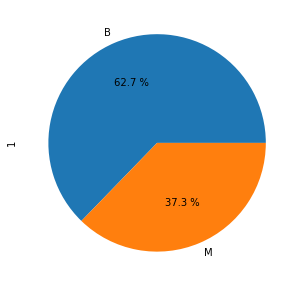

In [ ]:
df_bc[1].value_counts().plot.pie(figsize=(5, 5), autopct="%0.1f %%")

Este problema podríamos tratarlo como **clases Balanceadas**, ya que tenemos el 62.7% de la Clase Benigno, y el 37.3% de la clase Maligno.

### 3) South German Credit Data Set
Este es el [enlace al dataset](https://archive.ics.uci.edu/ml/datasets/South+German+Credit+%28UPDATE%29)

In [ ]:
# Descargamos nuestro dataset
data_description = pd.read_csv(r'https://raw.githubusercontent.com/Tecnologico-de-Monterrey-MNA/iayaa-Equipo-6/main/data/south-german-credit-prediction/DataDescription.csv?token=GHSAT0AAAAAABZNPR6HBRBIEGZUAXOIY6C6Y3QIZOA')
data_description.set_index('Column Name')
dict_nombres = data_description.set_index('Column Name').iloc[:,0].to_dict()

path = "https://raw.githubusercontent.com/Tecnologico-de-Monterrey-MNA/iayaa-Equipo-6/main/data/south-german-credit-prediction/SouthGermanCredit.asc?token=GHSAT0AAAAAABZNPR6GR2WH3NPWNLBZPIEKY3QI2SQ"
data_cred = pd.read_csv(path, delimiter=' ')

# Hacemos un head para ver el dataset
data_cred.rename(columns=dict_nombres, inplace= True)
data_cred.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [ ]:
data_cred.describe()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,...,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,1.145000,...,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.845000,1.404000,1.963000,0.700000
std,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,0.477706,...,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856,0.458487
min,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,1.000000,...,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,0.000000
50%,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,1.000000,...,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000
75%,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,1.000000,...,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000
max,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,3.000000,...,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,1.000000


---
### Objetivo y descripción del problema
Este conjunto de datos lo emplea una compañía bancaria. Los datos recolectados son usados para determinar el riesgo de otorgar una línea de crédito a una persona. Esta decisión está basada en otras características.

Se busca detectar el riesgo de otorgar un crédito a un cliente dadas ciertas características.

### Clases balanceadas o no balanceadas

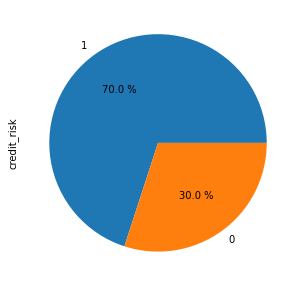

In [ ]:
data_cred["credit_risk"].value_counts().plot.pie(figsize=(5, 5), autopct="%0.1f %%")

Este problema podríamos tratarlo como **clases Balanceadas**, ya que tenemos el 70% de la Clase 1, y el 30% de la clase 0. Podríamos intentar balancear las clases si es que las métricas arrojan malos valores durante el entrenamiento y validación.

### 4) Telco customer churn: IBM dataset
Este es el [enlace al dataset](https://www.kaggle.com/datasets/yeanzc/telco-customer-churn-ibm-dataset)

In [20]:
path = "https://github.com/Tecnologico-de-Monterrey-MNA/iayaa-Equipo-6/blob/main/data/Telco_customer_churn.xlsx"
data_description.set_index('Column Name')
dict_nombres = data_description.set_index('Column Name').iloc[:,0].to_dict()

path = "https://github.com/Tecnologico-de-Monterrey-MNA/iayaa-Equipo-6/blob/main/data/Telco_customer_churn.xlsx"
data_ibm = pd.read_csv(path, delimiter=' ')


# Hacemos un head para ver el dataset
data_ibm.rename(columns=dict_nombres, inplace= True)
data_ibm.head()

NameError: ignored

### 5) Qualitative_Bankruptcy Data Set
Este es el [enlace al dataset](https://archive.ics.uci.edu/ml/datasets/Qualitative_Bankruptcy)